In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_txt_file(file_path):
    file_name = os.path.basename(file_path)    
    sampling_rate, frequency, amplitude, duration = file_name.split('_')[1::2]
    wave_type = file_name.split('_')[2]
    df = pd.read_csv(file_path, sep='\t', header=None, names = ["Time", "Voltage", "Frequency", "FFT Voltage", "NaN"])
    df.name = f'type_{wave_type}_sr_{sampling_rate}_freq_{frequency}_amp_{amplitude}_dur_{duration}'[0:-4]
    return df

def extract_data_from_folder(folder_path):
    all_dataframes = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".txt"):
            file_path = os.path.join(folder_path, file_name)
            df = read_txt_file(file_path)
            all_dataframes.append(df)

    return all_dataframes

data_folder_path = r"data"
dataframes_list = extract_data_from_folder(data_folder_path)

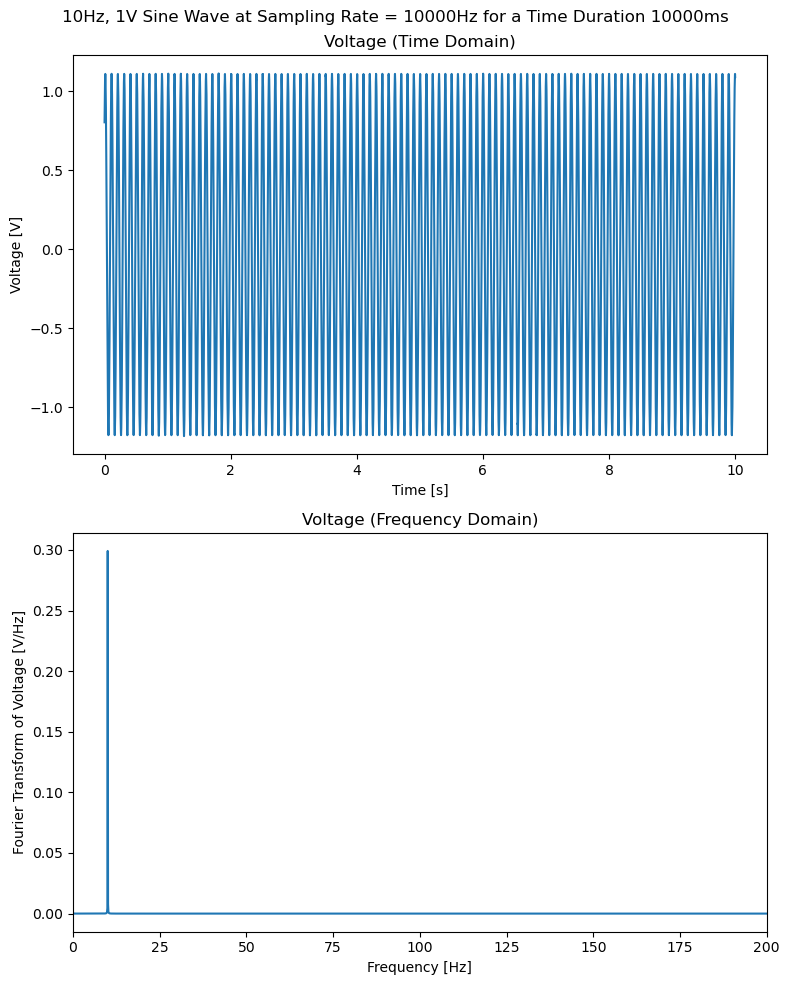

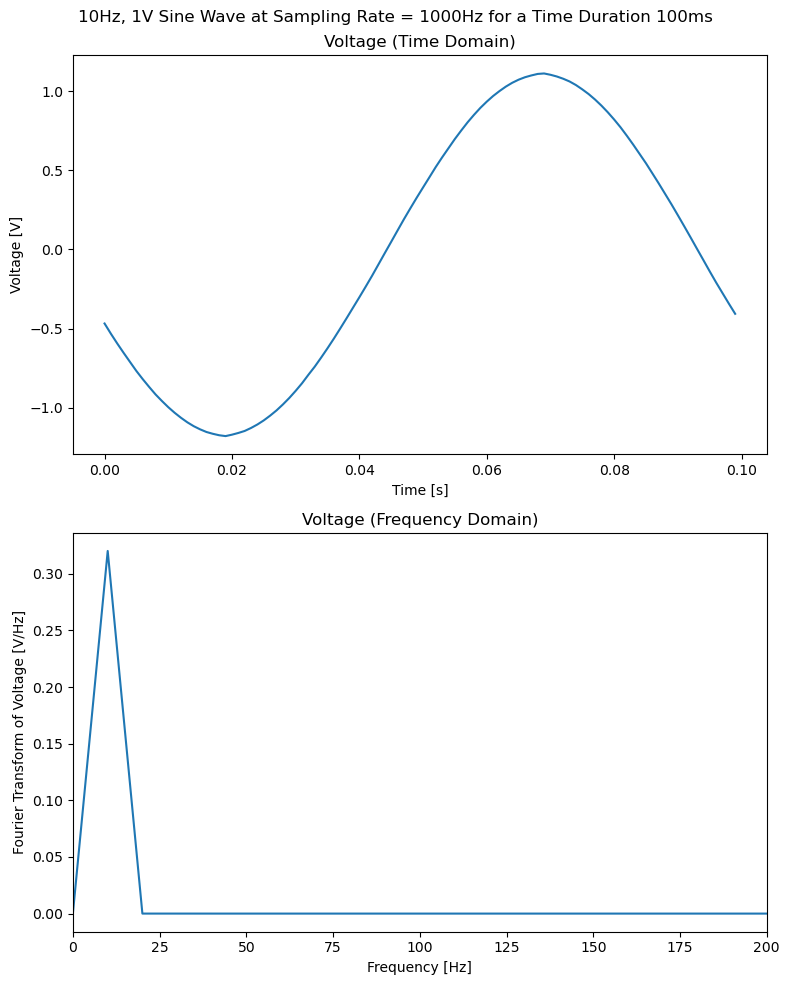

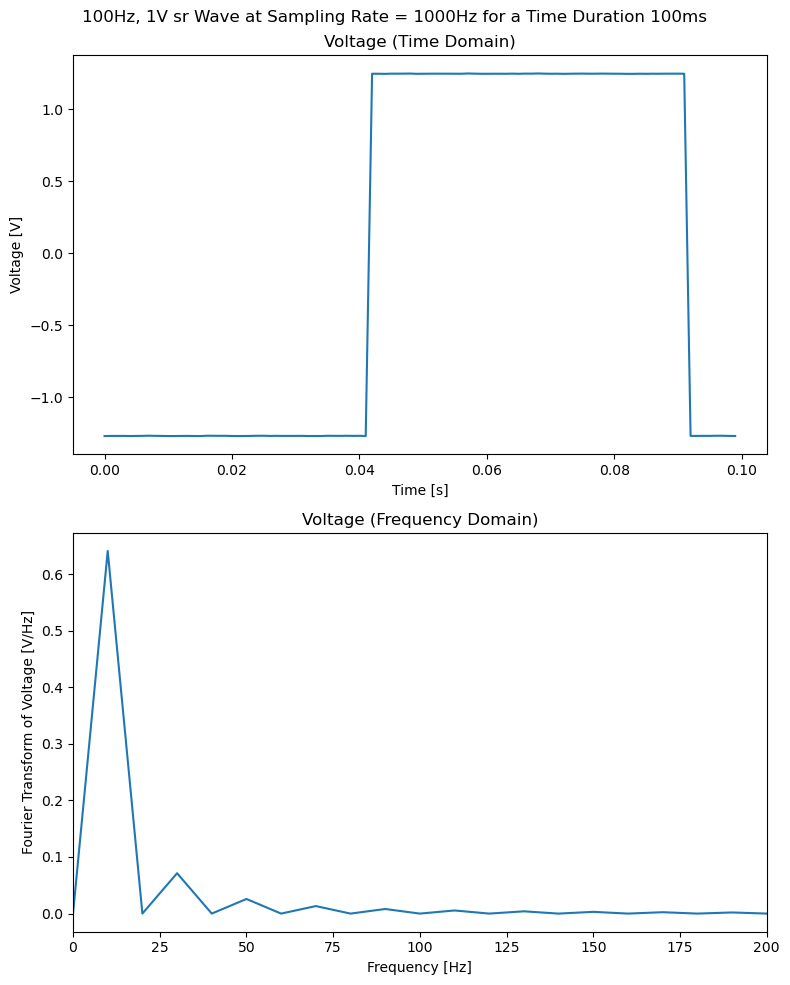

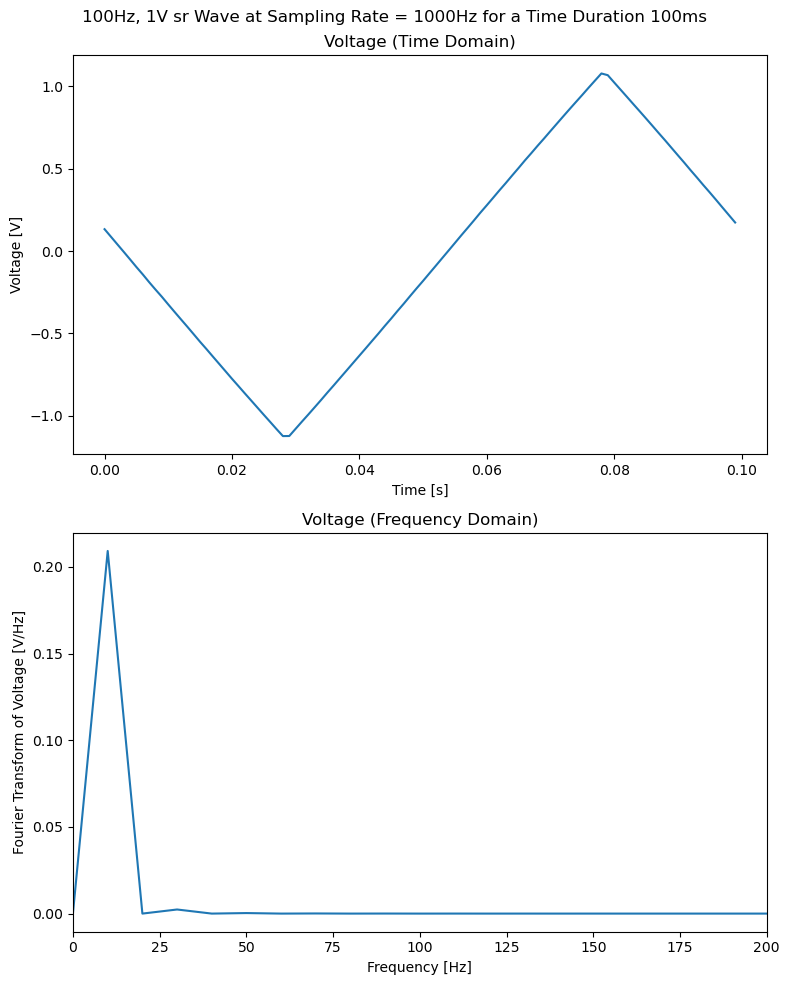

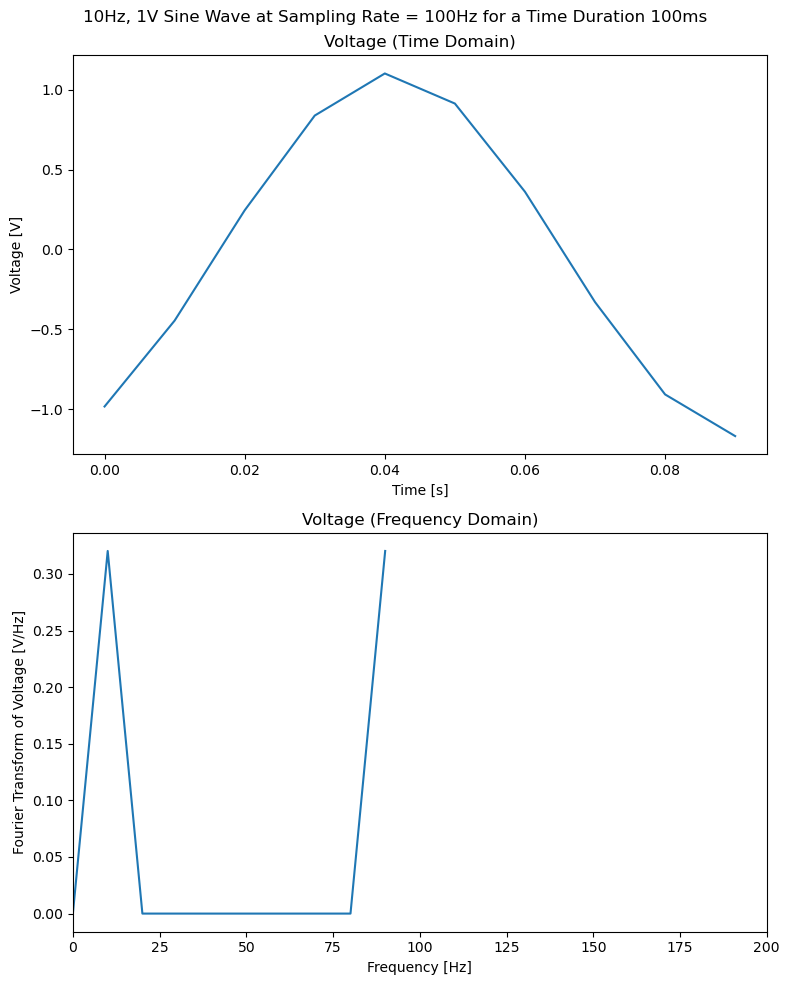

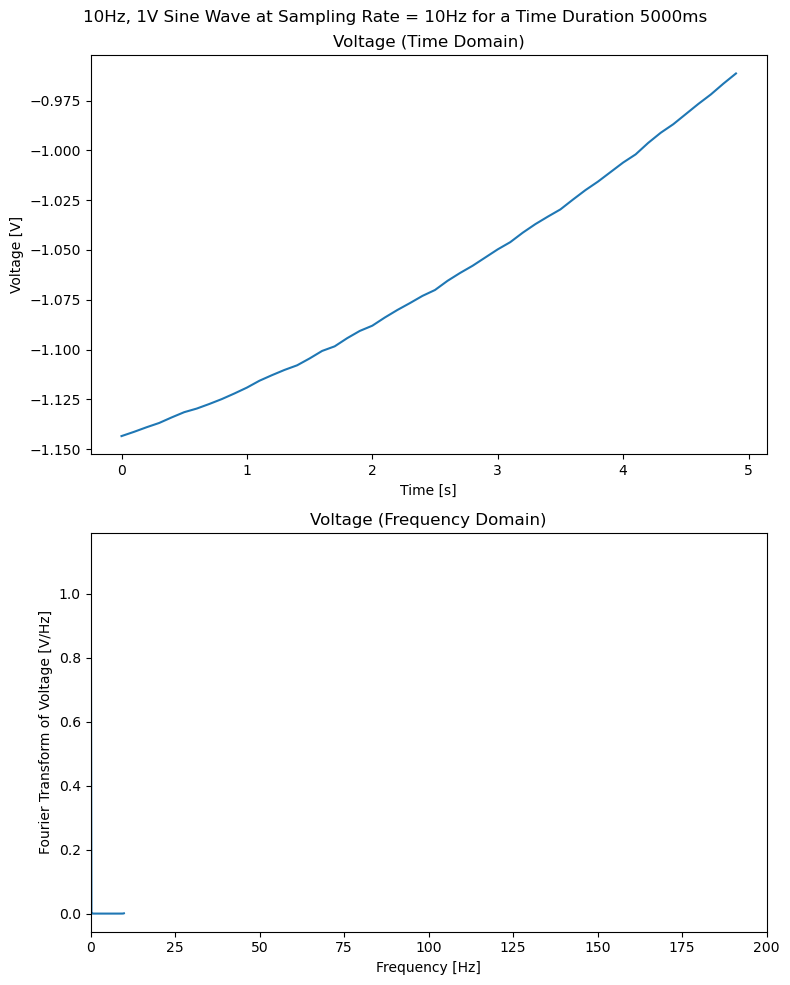

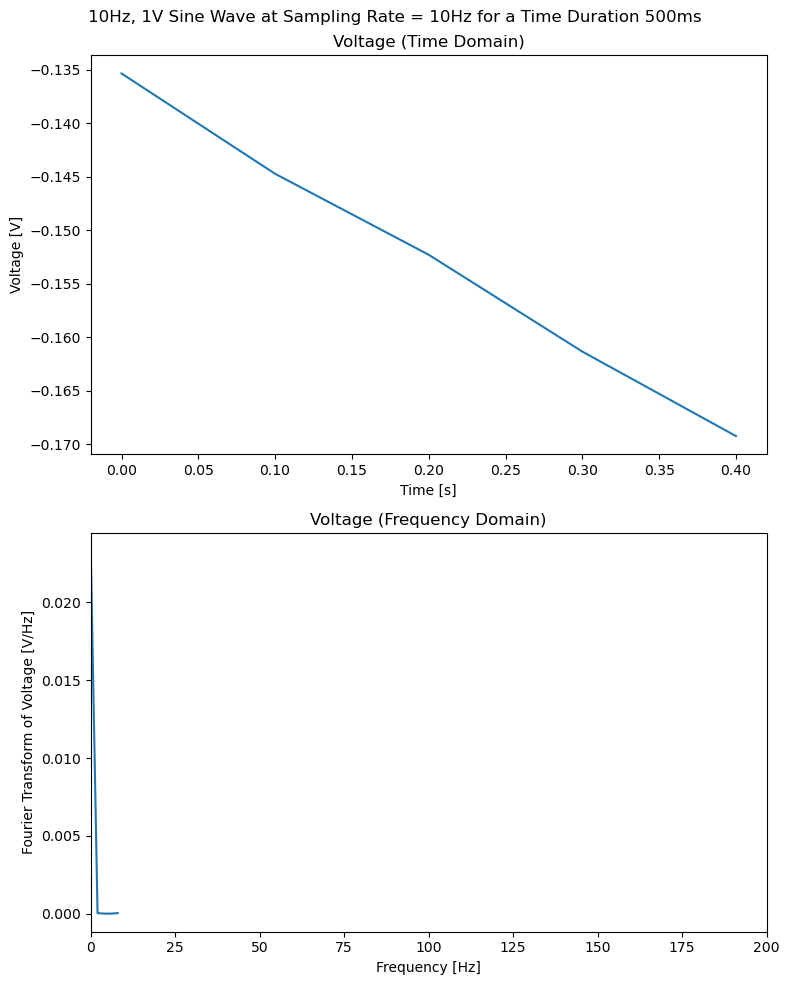

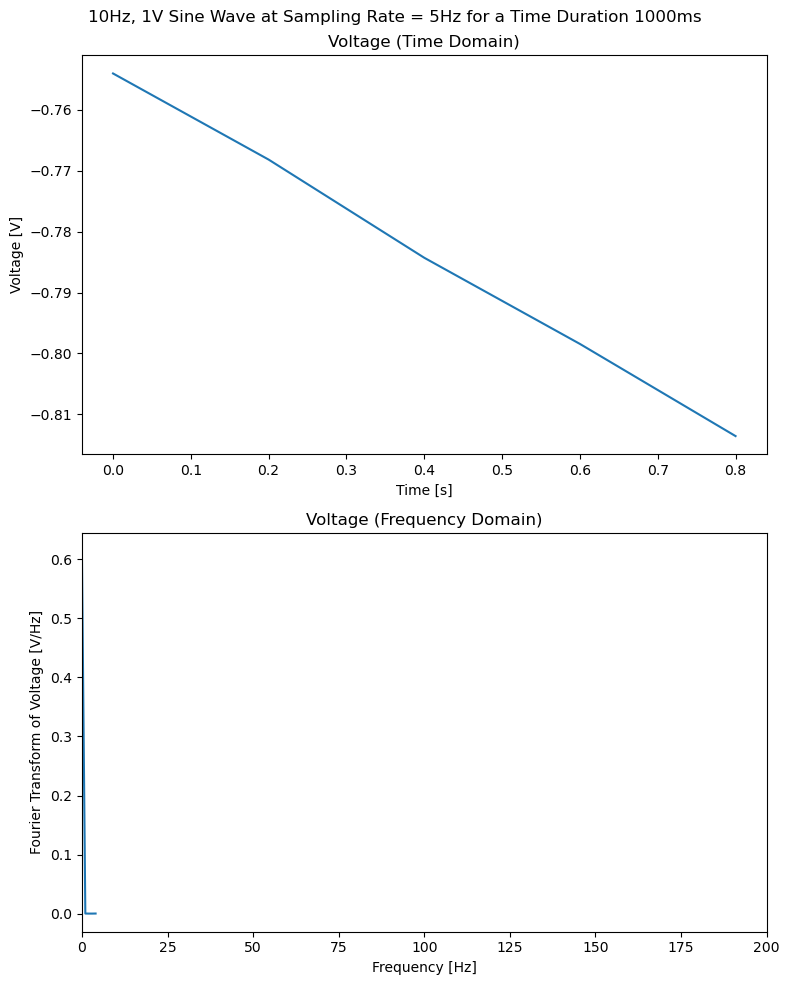

In [ ]:
for i, df in enumerate(dataframes_list): 
    
    fig, (ax1,ax2) = plt.subplots(2,1,figsize = (8,10))

    if "sine" in df.name: 
        name_chars = df.name.split("_")
        fig.suptitle(f"10Hz, {name_chars[7]} Sine Wave at Sampling Rate = {name_chars[3]} for a Time Duration {name_chars[9]}")
        ax1.plot(df["Time"], df["Voltage"])
        ax2.plot(df["Frequency"], df["FFT Voltage"])
        
        ax1.set_title("Voltage (Time Domain)")
        ax1.set_ylabel("Voltage [V]")
        ax1.set_xlabel("Time [s]")
        
        ax2.set_title("Voltage (Frequency Domain)")
        ax2.set_ylabel("Fourier Transform of Voltage [V/Hz]")
        ax2.set_xlabel("Frequency [Hz]")
        ax2.set_xlim(0,200)
        
    else:
        paname_chars = df.name.split("_")
        fig.suptitle(f"{name_chars[5]}, {name_chars[7]} {name_chars[2]} Wave at Sampling Rate = {name_chars[3]} for a Time Duration {name_chars[9]}")
        ax1.plot(df["Time"], df["Voltage"])
        ax2.plot(df["Frequency"], df["FFT Voltage"])
        
        ax1.set_title("Voltage (Time Domain)")
        ax1.set_ylabel("Voltage [V]")
        ax1.set_xlabel("Time [s]")
        
        ax2.set_title("Voltage (Frequency Domain)")
        ax2.set_ylabel("Fourier Transform of Voltage [V/Hz]")
        ax2.set_xlabel("Frequency [Hz]")
        ax2.set_xlim(0,200)
    
    fig.tight_layout()

Text(0.5, 1.0, 'Fourier Transforms for Sine Wave at Different Sampling Rates $f_s$ and Time Durations $\\Delta t$')

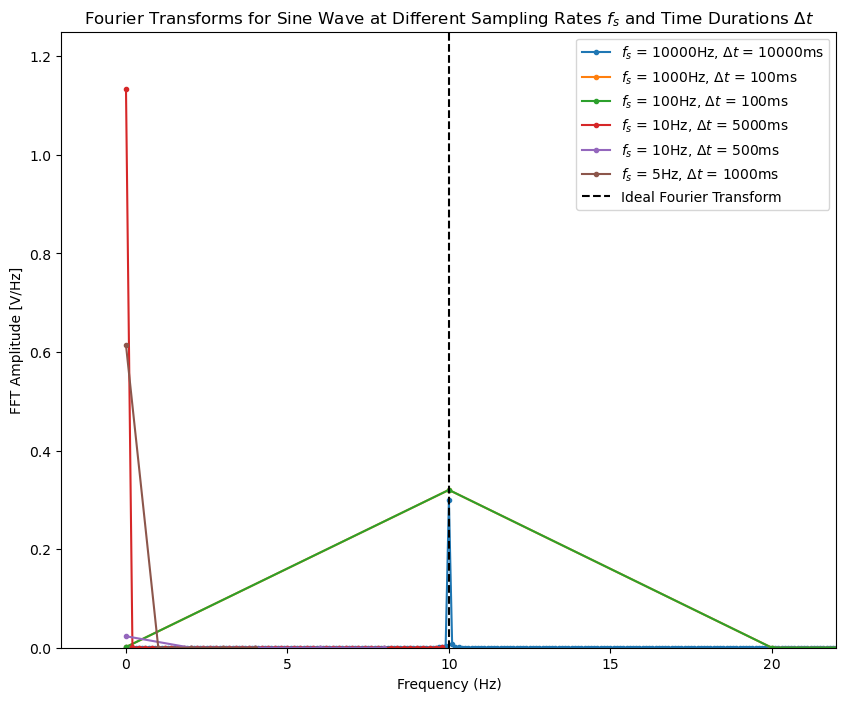

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
for i, df in enumerate(dataframes_list):
    if "sine" in df.name:
        name_chars = df.name.split("_")
        ax.plot(df["Frequency"], df["FFT Voltage"], ".-", label = f"$f_s$ = {name_chars[3]}, $\Delta t$ = {name_chars[9]}")

ax.axvline(x=10, color = 'k', linestyle = '--', label = "Ideal Fourier Transform")
ax.set_xlim(-2,22)
ax.set_ylim(0,1.25)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("FFT Amplitude [V/Hz]")
ax.legend(loc = "upper right")
ax.set_title("Fourier Transforms for Sine Wave at Different Sampling Rates $f_s$ and Time Durations $\Delta t$")
    

Text(0.5, 1.0, 'Waveforms of Sine Wave at Different Sampling Rates $f_s$ and Time Durations $\\Delta t$')

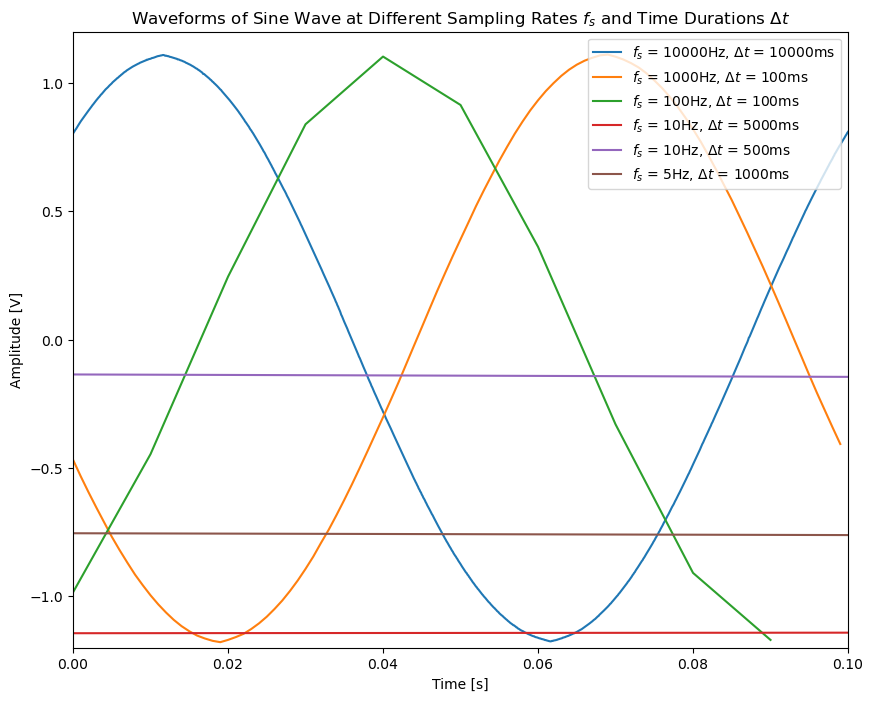

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
for i, df in enumerate(dataframes_list):
    if "sine" in df.name:
        name_chars = df.name.split("_")
        ax.plot(df["Time"], df["Voltage"], "-", label = f"$f_s$ = {name_chars[3]}, $\Delta t$ = {name_chars[9]}")

ax.set_xlim(0,.1)
ax.set_ylim(-1.2,1.2)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Amplitude [V]")
ax.legend(loc = "upper right")
ax.set_title("Waveforms of Sine Wave at Different Sampling Rates $f_s$ and Time Durations $\Delta t$")
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


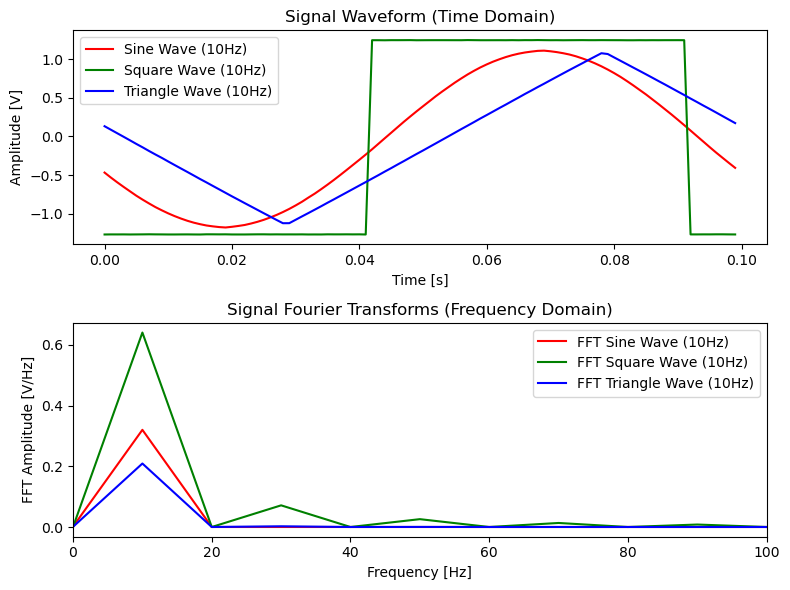

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (8,6))

colors = ['r','g','b']

for i, df in enumerate(dataframes_list):
    if "sine" in df.name:
        if "1000Hz" in df.name:
            ax1.plot(df["Time"], df["Voltage"], color = colors[0], label = "Sine Wave (10Hz)")
            ax2.plot(df["Frequency"], df["FFT Voltage"], color = colors[0], label = "FFT Sine Wave (10Hz)")
    elif "square" in df.name:
        ax1.plot(df["Time"], df["Voltage"], color = colors[1], label = "Square Wave (10Hz)")
        ax2.plot(df["Frequency"], df["FFT Voltage"], color = colors[1], label = "FFT Square Wave (10Hz)")

    elif "triangle" in df.name:
        ax1.plot(df["Time"], df["Voltage"], color = colors[2], label = "Triangle Wave (10Hz)")
        ax2.plot(df["Frequency"], df["FFT Voltage"], color=colors[2], label = "FFT Triangle Wave (10Hz)")
        
    ax1.legend()
    ax2.legend()
    ax1.set_ylabel("Amplitude [V]")
    ax2.set_ylabel("FFT Amplitude [V/Hz]")
    ax1.set_xlabel("Time [s]")
    ax2.set_xlabel("Frequency [Hz]")
    
    ax2.set_xlim(0,100)
    ax1.set_title("Signal Waveform (Time Domain)")
    ax2.set_title("Signal Fourier Transforms (Frequency Domain)")
fig.tight_layout()


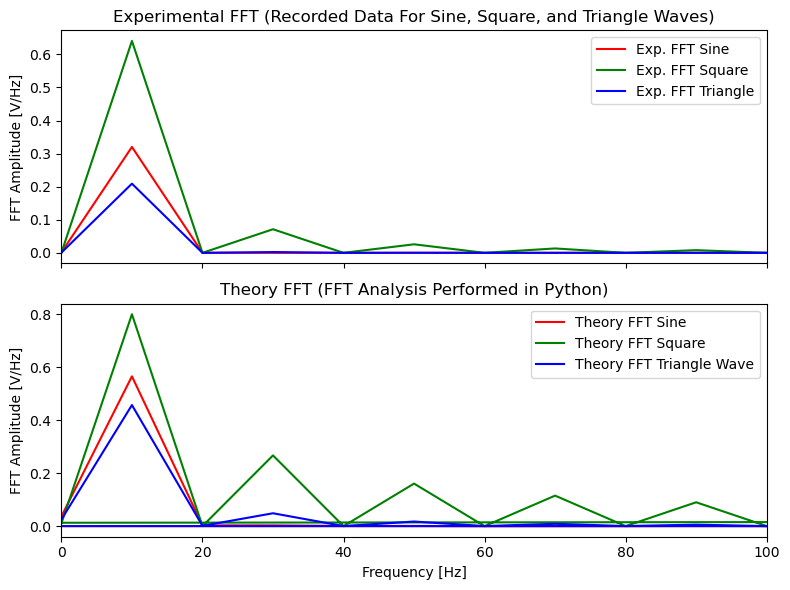

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

colors = ['r', 'g', 'b']

for i, df in enumerate(dataframes_list):
    if "sine" in df.name:
        if "1000Hz" in df.name:
            # Plot theoretical signal
            ax1.plot(df["Frequency"], df["FFT Voltage"], color=colors[0], label="Exp. FFT Sine")

            # Perform Fourier Transform on the theoretical signal using NumPy's fft
            time_points = df["Time"]
            voltage_signal = df["Voltage"]
            dt = time_points[1] - time_points[0]
            N = len(time_points)
            fft_theoretical = np.fft.fft(voltage_signal)
            freq_theoretical = np.fft.fftfreq(N, dt)

            # Plot the theoretical FFT
            ax2.plot(freq_theoretical, np.abs(fft_theoretical)*0.01, color=colors[0], label="Theory FFT Sine")

    elif "square" in df.name:
        # Plot theoretical signal
        ax1.plot(df["Frequency"], df["FFT Voltage"], color=colors[1], label="Exp. FFT Square")

        # Perform Fourier Transform on the theoretical signal using NumPy's fft
        time_points = df["Time"]
        voltage_signal = df["Voltage"]
        dt = time_points[1] - time_points[0]
        N = len(time_points)
        fft_theoretical = np.fft.fft(voltage_signal)
        freq_theoretical = np.fft.fftfreq(N, dt)

        # Plot the theoretical FFT
        ax2.plot(freq_theoretical, np.abs(fft_theoretical)*0.01, color=colors[1], label="Theory FFT Square")

    elif "triangle" in df.name:
        # Plot theoretical signal
        ax1.plot(df["Frequency"], df["FFT Voltage"], color=colors[2], label="Exp. FFT Triangle")

        # Perform Fourier Transform on the theoretical signal using NumPy's fft
        time_points = df["Time"]
        voltage_signal = df["Voltage"]
        dt = time_points[1] - time_points[0]
        N = len(time_points)
        fft_theoretical = np.fft.fft(voltage_signal)
        freq_theoretical = np.fft.fftfreq(N, dt)

        # Plot the theoretical FFT
        ax2.plot(freq_theoretical, np.abs(fft_theoretical)*0.01, color=colors[2], label="Theory FFT Triangle Wave")

# Set labels, legends, and titles outside the loop
ax1.legend()
ax2.legend()
ax1.set_ylabel("FFT Amplitude [V/Hz]")
ax2.set_ylabel("FFT Amplitude [V/Hz]")
ax2.set_xlabel("Frequency [Hz]")

ax2.set_xlim(0, 100)
ax1.set_title("Experimental FFT (Recorded Data For Sine, Square, and Triangle Waves)")
ax2.set_title("Theory FFT (FFT Analysis Performed in Python)")

fig.tight_layout()
plt.show()


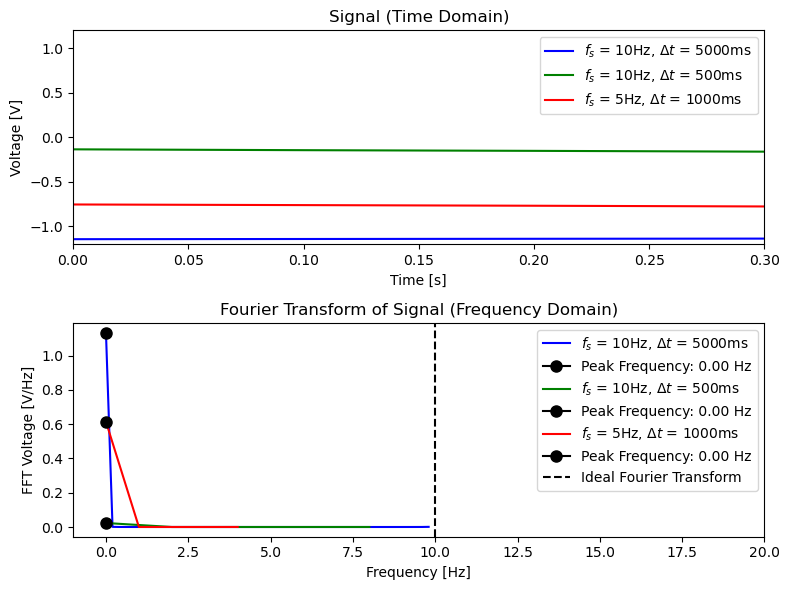

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Assuming you have defined colors somewhere
colors = ['r', 'g', 'b']

for i, df in enumerate(dataframes_list):
    name_chars = df.name.split("_")
    if "5Hz" in df.name:
        ax1.plot(df["Time"], df["Voltage"], color=colors[0], label=f"$f_s$ = {name_chars[3]}, $\Delta t$ = {name_chars[9]}")
        ax2.plot(df["Frequency"], df["FFT Voltage"], color=colors[0], linestyle="-", label=f"$f_s$ = {name_chars[3]}, $\Delta t$ = {name_chars[9]}")
        
        max_fft_value = np.max(np.abs(df["FFT Voltage"]))
        max_fft_freq = df.loc[np.abs(df["FFT Voltage"]).idxmax(), "Frequency"]
        ax2.plot(max_fft_freq, max_fft_value, marker='o', markersize=8, color='black', label=f"Max FFT: {max_fft_value:.2f} V/Hz")

    elif "10Hz" in df.name:
        if "500ms" in df.name:
            ax1.plot(df["Time"], df["Voltage"], color=colors[1], label=f"$f_s$ = {name_chars[3]}, $\Delta t$ = {name_chars[9]}")
            ax2.plot(df["Frequency"], df["FFT Voltage"], color=colors[1], linestyle="-", label=f"$f_s$ = {name_chars[3]}, $\Delta t$ = {name_chars[9]}")
            
            max_fft_value = np.max(np.abs(df["FFT Voltage"]))
            max_fft_freq = df.loc[np.abs(df["FFT Voltage"]).idxmax(), "Frequency"]
            ax2.plot(max_fft_freq, max_fft_value, marker='o', markersize=8, color='black', label=f"Max FFT: {max_fft_value:.2f} V/Hz")
        else:
            ax1.plot(df["Time"], df["Voltage"], color=colors[2], label=f"$f_s$ = {name_chars[3]}, $\Delta t$ = {name_chars[9]}")
            ax2.plot(df["Frequency"], df["FFT Voltage"], color=colors[2], linestyle="-", label=f"$f_s$ = {name_chars[3]}, $\Delta t$ = {name_chars[9]}")
            
            max_fft_value = np.max(np.abs(df["FFT Voltage"]))
            max_fft_freq = df.loc[np.abs(df["FFT Voltage"]).idxmax(), "Frequency"]
            ax2.plot(max_fft_freq, max_fft_value, marker='o', markersize=8, color='black', label=f"Max FFT: {max_fft_value:.2f} V/Hz")


ax1.set_ylim(-1.2, 1.2)
ax1.set_xlim(0, 0.3)
ax2.axvline(x=10, color='k', linestyle='--', label="Ideal Fourier Transform")
ax2.set_xlim(-1, 20)

ax1.legend()
ax2.legend()

ax1.set_title("Signal (Time Domain)")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Voltage [V]")

ax2.set_title("Fourier Transform of Signal (Frequency Domain)")
ax2.set_xlabel("Frequency [Hz]")
ax2.set_ylabel("FFT Voltage [V/Hz]")

fig.tight_layout()
plt.show()


C:\Users\jwdes\AppData\Local\Temp\ipykernel_11116\1310824618.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('winter', len(n_harmonics))


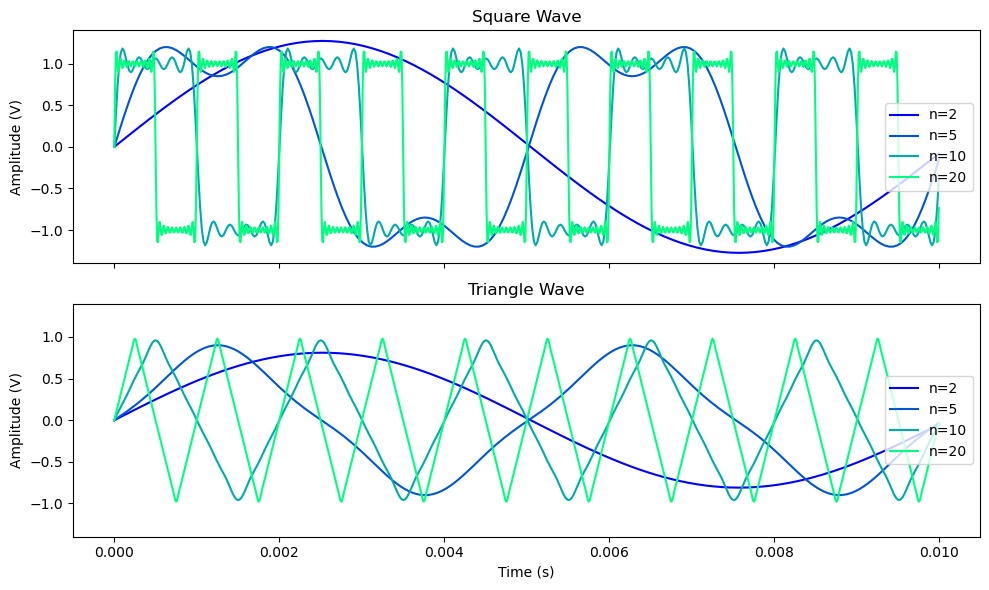

In [ ]:
from matplotlib.cm import get_cmap

def fourier_series_square_wave(n, f, duration=1, sampling_rate=1000):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    
    square_wave = 0
    for i in range(1, n, 2):
        harmonic = (1/i) * np.sin(2 * np.pi * i * f * t)
        square_wave += harmonic

    square_wave = 4/np.pi * square_wave
    return np.tile(square_wave, int(n/2))

def fourier_series_triangle_wave(n, f, duration=1, sampling_rate=10000):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    
    triangle_wave = 0
    for i in range(1, n, 2):
        harmonic = (-1)**((i-1)/2) * (1/i**2) * np.sin(2 * np.pi * i * f * t)
        triangle_wave += harmonic

    triangle_wave = 8/(np.pi**2) * triangle_wave
    return np.tile(triangle_wave, int(n/2))

n_harmonics = [2, 5, 10, 20]
frequency = 100  # Hz
duration = 0.01   # seconds
sampling_rate = 10000

cmap = get_cmap('winter', len(n_harmonics))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=True)

for i, n in enumerate(n_harmonics):
    square_wave_signal = fourier_series_square_wave(n, frequency, duration, sampling_rate)
    triangle_wave_signal = fourier_series_triangle_wave(n, frequency, duration, sampling_rate)

    ax1.plot(np.linspace(0, duration, len(square_wave_signal)), square_wave_signal, color=cmap(i), label=f"n={n}")
    ax2.plot(np.linspace(0, duration, len(triangle_wave_signal)), triangle_wave_signal, color=cmap(i), label=f"n={n}")
    
ax1.legend(loc="center right")
ax2.legend(loc="center right")

ax1.set_title("Square Wave")
ax2.set_title("Triangle Wave")

ax2.set_xlabel("Time (s)")
ax1.set_ylabel("Amplitude (V)")
ax2.set_ylabel("Amplitude (V)")

plt.tight_layout()
plt.show()


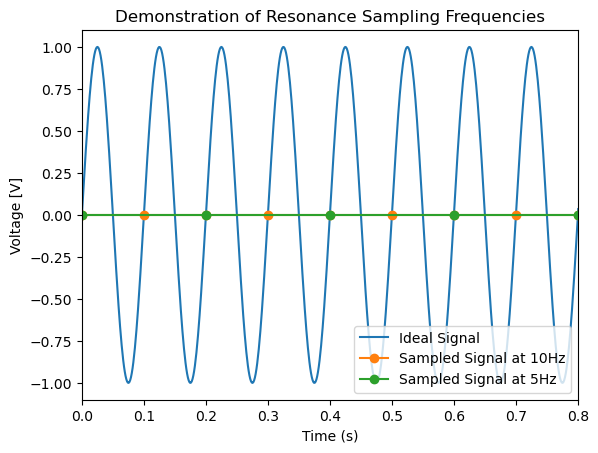

In [ ]:
def sample(f, sample_rate):
    time = np.arange(0, 1, 1/sample_rate)
    sampled_points = f(time)
    return time, sampled_points

def sine(time, freq):
    return np.sin(2 * np.pi * time * freq)

fig, ax = plt.subplots()
time = np.linspace(0, 4 * np.pi, 10000)
ax.plot(time, sine(time, 10), label='Ideal Signal')
sampled_time, sampled_points = sample(lambda t: sine(t, 10), 10)
ax.plot(sampled_time, sampled_points, 'o-', label='Sampled Signal at 10Hz')

sampled_time, sampled_points = sample(lambda t: sine(t, 10), 5)
ax.plot(sampled_time, sampled_points, 'o-', label='Sampled Signal at 5Hz')

ax.set_title("Demonstration of Resonance Sampling Frequencies")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage [V]")

ax.set_xlim(0,0.8)
ax.legend(loc = "lower right")
plt.show()
